# Projeto 2 - Ciência dos Dados
---

### Turma C

### Nomes
Gustavo Eizo Takahashi

João Pedro Lindenberg

Marcos Augusto Rossi Paulino Costa

---

In [227]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import re


<h1 style="color:yellow;">Objetivo do Projeto</h1>

In [228]:
print('Esperamos trabalhar no diretório')
print(os.getcwd())

Esperamos trabalhar no diretório
/Users/takahashi/Insper (Local)/P2p2pp2/P2_CEDA2


> O objetivo fundamental do **Projeto 2** consiste em realizar a previsão de uma variável de interesse (denominada como "**Target**") com base em outras variáveis conhecidas como variáveis explicativas ou "**features**", que são variáveis tanto quantitativas quanto qualitativas relacionadas ao target. Tendo em mente que nosso target é qualitativo, estamos planejando desenvolver um **modelo de classificação** destinado a essa variável categórica com base nas "features" selecionadas.


---
<h1 style="color:yellow;">Introdução do tema e Pergunta Norteadora:</h1>


## Dado o perfil socioeconômico, recursos disponíveis e localização geográfica de uma escola, é provável que ela forneça acesso à Internet para seus alunos?

> O assunto escolhido aborda o acesso à internet nas escolas do estado do Amazonas por meio de uma análise de diversos dados. Tendo isso em mente, o propósito do trabalho se resume à seguinte pergunta: é possível saber se uma determinada escola fornece ou não acesso à internet aos alunos com base em características da escola? Alguns exemplos dessas características são: quantidade de professores, tipo de localização (área urbana ou rural), dependência administrativa (pública ou privada), etc.

> A relevância prática desse classificador é significativa, pois ele proporciona uma ferramenta valiosa para a tomada de decisões e o direcionamento de recursos. Ao categorizar as escolas com base em suas características, o classificador pode auxiliar na identificação daquelas que necessitam de investimentos específicos para melhorar ou implementar o acesso à internet. Dessa forma, contribui não apenas para o entendimento da situação atual, mas também para o desenvolvimento de estratégias eficazes visando aprimorar a conectividade nas escolas, promovendo um ambiente educacional mais inclusivo e tecnologicamente avançado.

---
<h1 style="color:yellow;"> Minerando Dados e Caracteristicas do Dataset:</h1>

Microdados do Censo Escolar da Educação Básica 2022

https://www.gov.br/inep/pt-br/acesso-a-informacao/dados-abertos/microdados/censo-escolar


In [242]:
dados = pd.read_csv("microdados_ed_basica_2022.csv", encoding='cp1252', sep=';')

In [246]:
dados.head()

,NU_ANO_CENSO,NO_REGIAO,CO_REGIAO,NO_UF,SG_UF,CO_UF,NO_MUNICIPIO,CO_MUNICIPIO,NO_MESORREGIAO,CO_MESORREGIAO,...,QT_TUR_FUND_AF,QT_TUR_MED,QT_TUR_PROF,QT_TUR_PROF_TEC,QT_TUR_EJA,QT_TUR_EJA_FUND,QT_TUR_EJA_MED,QT_TUR_ESP,QT_TUR_ESP_CC,QT_TUR_ESP_CE
0,2022,Norte,1,Rondônia,RO,11,Alta Floresta D'Oeste,1100015,Leste Rondoniense,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2022,Norte,1,Rondônia,RO,11,Alta Floresta D'Oeste,1100015,Leste Rondoniense,2,...,0.0,0.0,0.0,0.0,10.0,6.0,4.0,3.0,3.0,0.0
2,2022,Norte,1,Rondônia,RO,11,Alta Floresta D'Oeste,1100015,Leste Rondoniense,2,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2022,Norte,1,Rondônia,RO,11,Alta Floresta D'Oeste,1100015,Leste Rondoniense,2,...,6.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
4,2022,Norte,1,Rondônia,RO,11,Alta Floresta D'Oeste,1100015,Leste Rondoniense,2,...,5.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,3.0,0.0


In [244]:
dados.shape

(224649, 385)

In [232]:
dados.describe()

,NU_ANO_CENSO,CO_REGIAO,CO_UF,CO_MUNICIPIO,CO_MESORREGIAO,CO_MICRORREGIAO,CO_DISTRITO,CO_ENTIDADE,TP_DEPENDENCIA,TP_CATEGORIA_ESCOLA_PRIVADA,...,QT_TUR_FUND_AF,QT_TUR_MED,QT_TUR_PROF,QT_TUR_PROF_TEC,QT_TUR_EJA,QT_TUR_EJA_FUND,QT_TUR_EJA_MED,QT_TUR_ESP,QT_TUR_ESP_CC,QT_TUR_ESP_CE
count,224649.0,224649.000000,224649.000000,2.246490e+05,224649.000000,224649.000000,2.246490e+05,2.246490e+05,224649.000000,41759.000000,...,178346.000000,178346.000000,178346.000000,178346.000000,178346.000000,178346.000000,178346.000000,178346.000000,178346.000000,178346.000000
mean,2022.0,2.647040,30.259347,3.041188e+06,5.019159,19.830447,3.041188e+08,3.042829e+07,3.101915,1.656769,...,2.822087,1.496383,0.450871,0.423604,0.677520,0.469374,0.208146,4.794747,4.676954,0.117794
std,0.0,1.022897,9.447640,9.484777e+05,3.872808,17.119943,9.484777e+07,9.449441e+06,0.639568,1.194840,...,4.828169,4.721087,3.658270,3.521317,3.031475,1.987312,1.710352,6.146976,6.064907,1.338076
min,2022.0,1.000000,11.000000,1.100015e+06,1.000000,1.000000,1.100015e+08,1.100002e+07,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2022.0,2.000000,23.000000,2.313005e+06,2.000000,7.000000,2.313005e+08,2.327619e+07,3.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2022.0,3.000000,31.000000,3.112604e+06,4.000000,15.000000,3.112604e+08,3.108828e+07,3.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,2.000000,0.000000
75%,2022.0,3.000000,35.000000,3.547304e+06,6.000000,27.000000,3.547304e+08,3.523732e+07,4.000000,2.000000,...,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.000000,7.000000,0.000000
max,2022.0,5.000000,53.000000,5.300108e+06,15.000000,66.000000,5.300108e+08,5.308803e+07,4.000000,4.000000,...,94.000000,167.000000,424.000000,424.000000,365.000000,151.000000,268.000000,146.000000,146.000000,65.000000


In [233]:
# USANDO SOMENTE O AMAZONAS
dados_filtrados = dados[dados['NO_UF'] == 'Amazonas']

# FILTRANDO SOMENTE AS ESCOLAS QUE ESTÃO EM FUNCIONAMENTO
dados_filtrados = dados_filtrados[dados_filtrados['TP_SITUACAO_FUNCIONAMENTO'] == 1]

---
<h2 style="color:blue;">Categoria Target definida:</h2>

## 
Variável: IN_INTERNET_ALUNOS

Acesso à Internet - Para uso dos alunos 
- 0: Não 
- 1: Sim






---
<h2 style="color:blue;">Pesquisa sobre fatores relacionados ao acesso à internet nas escolas</h2>







---
<h1 style="color:yellow;">Análise Exploratória dos Dados</h1>


<h3 style="color:lightgreen;">Escolha à priori de possíveis features baseando na pesquisa prévia
</h3>





Legenda:
-    <span style="color: cyan">**Variável Qualitativa**</span>
-    <span style="color: orange">**Variável Quantitativa**</span>
---

-   <span style="color: cyan">**TP_DEPENDENCIA**</span> - Dependência Administrativa (pública, privada, etc.)

-   <span style="color: cyan">**TP_CATEGORIA_ESCOLA_PRIVADA**</span> - Categoria da escola privada

-   <span style="color: cyan">**TP_LOCALIZACAO**</span> - Localização (urbana, rural)

-   <span style="color: cyan">**TP_LOCALIZACAO_DIFERENCIADA**</span> - Localização diferenciada da escola

-   <span style="color: cyan">**TP_SITUACAO_FUNCIONAMENTO**</span> - Situação de funcionamento da escola

-   <span style="color: cyan">**IN_AGUA_FILTRADA**</span> - Indica se a escola possui água filtrada.

-   <span style="color: cyan">**IN_ENERGIA_INEXISTENTE**</span> - Informa se a escola não possui energia elétrica.

-   <span style="color: cyan">**IN_ESGOTO_INEXISTENTE**</span> - Indica se a escola não possui esgoto.

-   <span style="color: cyan">**IN_LIXO_RECICLA**</span> - Informa se a escola realiza reciclagem de lixo.

-   <span style="color: cyan">**IN_BIBLIOTECA**</span> - Indica a existência de biblioteca na escola.

-   <span style="color: cyan">**IN_SALA_PROFESSOR**</span> - Informa se a escola possui sala de professores.

-   <span style="color: cyan">**IN_LABORATORIO_CIENCIAS**</span> - Indica a existência de laboratório de ciências.

-   <span style="color: cyan">**IN_SALA_ATENDIMENTO_ESPECIAL**</span> - Informa sobre a existência de salas para atendimento especial.

-   <span style="color: cyan">**IN_QUADRA_ESPORTES**</span> - Indica a existência de quadra de esportes na escola.

-   <span style="color: cyan">**IN_COMPUTADOR**</span> - Informa se a escola possui computadores.

-   <span style="color: cyan">**IN_INTERNET**</span> - Indica se a escola possui acesso à internet.

-   <span style="color: cyan">**IN_BANDA_LARGA**</span> - Informa se a escola possui conexão banda larga.

-   <span style="color: cyan">**IN_ALIMENTACAO**</span> - Indica se a escola oferece alimentação para os alunos.

-   <span style="color: cyan">**IN_PATIO_COBERTO**</span> - Informa se a escola possui pátio coberto.

-   <span style="color: cyan">**IN_AREA_VERDE**</span> - Indica a existência de área verde na escola.

-   <span style="color: orange">**QT_FUNCIONARIOS**</span> - Total de funcionários da escola (inclusive profissionais escolares 
em sala de aula)



<h3 style="color:lightgreen;">Filtrando DataFrame
</h3>

In [263]:
# SELECIONANDO SOMENTE AS COLUNAS QUE QUEREMOS
colunas_selecionadas = ['IN_INTERNET_ALUNOS','NO_UF', 'IN_AREA_VERDE', 'IN_AGUA_FILTRADA', 'IN_BIBLIOTECA', 'TP_LOCALIZACAO', 'QT_FUNCIONARIOS','TP_DEPENDENCIA','QT_PROF_SERVICOS_GERAIS']
df_projeto = dados_filtrados[colunas_selecionadas]

# RENOMEANDO AS COLUNAS
df_projeto = df_projeto.rename(columns={
    'IN_INTERNET_ALUNOS':'Alunos Internet',
    'NO_UF':'Estado',
    'IN_AREA_VERDE':'Área Verde',
    'IN_AGUA_FILTRADA':'Água Filtrada',
    'IN_BIBLIOTECA':'Biblioteca',
    'TP_LOCALIZACAO':'Urbano ou Rural',
    'QT_FUNCIONARIOS':'Funcionários',
    'TP_DEPENDENCIA':'Dependencia',
    'QT_PROF_SERVICOS_GERAIS': 'Profissionais Gerais'

})

df_projeto

,Alunos Internet,Estado,Área Verde,Água Filtrada,Biblioteca,Urbano ou Rural,Funcionários,Dependencia,Profissionais Gerais
3077,0.0,Amazonas,1.0,NaN,0.0,1,NaN,2,4.0
3078,0.0,Amazonas,0.0,NaN,0.0,1,NaN,2,0.0
3079,0.0,Amazonas,1.0,NaN,0.0,2,NaN,3,0.0
3080,0.0,Amazonas,1.0,NaN,0.0,2,NaN,3,0.0
3081,0.0,Amazonas,0.0,NaN,0.0,2,NaN,3,1.0
...,...,...,...,...,...,...,...,...,...
9398,0.0,Amazonas,1.0,NaN,0.0,2,NaN,3,0.0
9400,0.0,Amazonas,1.0,NaN,1.0,2,NaN,3,7.0
9401,0.0,Amazonas,1.0,NaN,0.0,2,NaN,3,1.0
9402,0.0,Amazonas,1.0,NaN,0.0,1,NaN,3,2.0


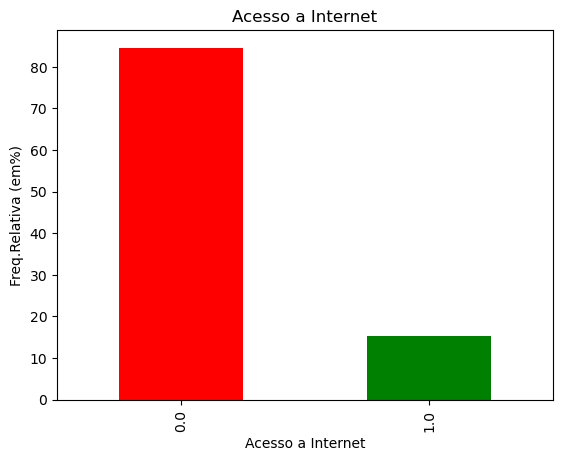

In [235]:
df_internet = df_projeto['Alunos Internet'].value_counts(normalize=True)*100

df_internet_valores = df_projeto['Alunos Internet'].value_counts(normalize=True)*100
df_internet_valores.plot(kind='bar', color=('red', 'green'))
plt.title('Acesso a Internet')
plt.ylabel('Freq.Relativa (em%)')
plt.xlabel('Acesso a Internet')
plt.show()

## Verificando a correlação entre as features e o target

### Feature: Localização da escola: Urbana ou Rural

In [247]:
print("Resumo Feature Urbana ou Rural" + "\n-------------------------------")
print(df_projeto["Urbano ou Rural"].describe())

Resumo Feature Urbana ou Rural
-------------------------------
count    5463.000000
mean        1.663555
std         0.472536
min         1.000000
25%         1.000000
50%         2.000000
75%         2.000000
max         2.000000
Name: Urbano ou Rural, dtype: float64


In [236]:
cross_table_Urbana_Rural = (pd.crosstab(df_projeto['Alunos Internet'], df_projeto['Urbano ou Rural'])/len(df_projeto))*100

# 54% das localizações urbanas não possuem acesso a internet
# Somente 3.33% na area rural possuem acesso a internet
cross_table_Urbana_Rural

Urbano ou Rural,1,2
Alunos Internet,,
0.0,21.618159,62.493136
1.0,11.403990,3.862347


### Feature: Escola possui áreas verdes

In [248]:
print("Resumo Feature Áreas Verdes" + "\n-------------------------------")
print(df_projeto["Área Verde"].describe())

Resumo Feature Áreas Verdes
-------------------------------
count    5429.000000
mean        0.417020
std         0.493112
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: Área Verde, dtype: float64


Urbano ou Rural         1         2
Alunos Internet                    
0.0              0.217535  0.628845
1.0              0.114754  0.038865


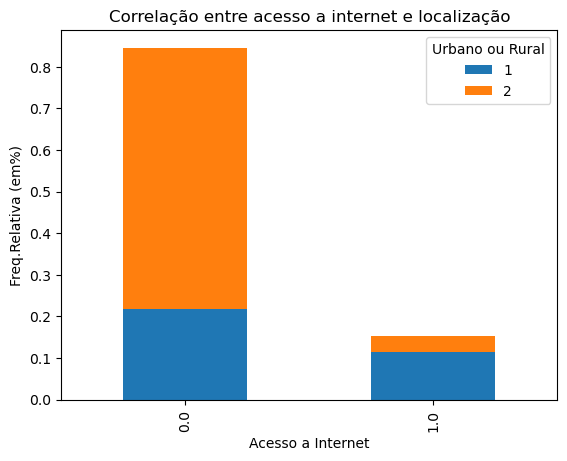

In [258]:
cross_table_Urbana_Rural = pd.crosstab(df_projeto['Alunos Internet'], df_projeto['Urbano ou Rural'], normalize=True)

print(cross_table_Urbana_Rural)

cross_table_Urbana_Rural.plot(kind='bar', stacked=True)
plt.title('Correlação entre acesso a internet e localização')
plt.xlabel('Acesso a Internet')
plt.ylabel('Freq.Relativa (em%)')
plt.show()


### Feature: Escola possui Água Filtrada

In [238]:
cross_table_Água_filtrada = (pd.crosstab(df_projeto['Alunos Internet'], df_projeto['Água Filtrada'])/len(df_projeto))*100
cross_table_Água_filtrada

Água Filtrada
Alunos Internet


### Feature: Escola possui Biblioteca

Biblioteca            0.0       1.0
Alunos Internet                    
0.0              0.706207  0.140173
1.0              0.047707  0.105913


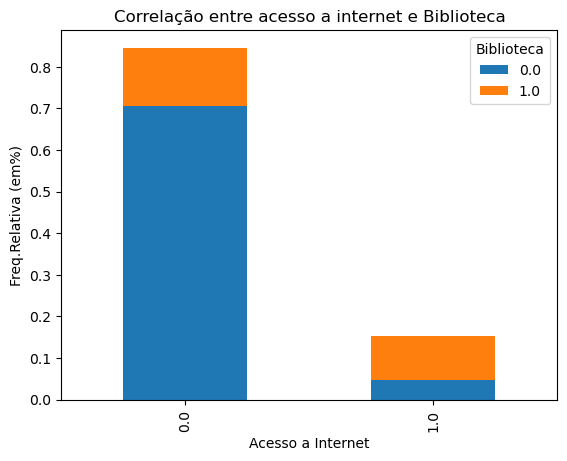

In [259]:
cross_table_Urbana_Rural = pd.crosstab(df_projeto['Alunos Internet'], df_projeto['Biblioteca'], normalize=True)

print(cross_table_Urbana_Rural)

cross_table_Urbana_Rural.plot(kind='bar', stacked=True)
plt.title('Correlação entre acesso a internet e Biblioteca')
plt.xlabel('Acesso a Internet')
plt.ylabel('Freq.Relativa (em%)')
plt.show()

In [239]:
cross_table_Biblioteca = (pd.crosstab(df_projeto['Alunos Internet'], df_projeto['Biblioteca'])/len(df_projeto))*100
cross_table_Biblioteca

Biblioteca,0.0,1.0
Alunos Internet,,
0.0,70.181219,13.930075
1.0,4.740985,10.525352


### Feature: Tipo de Dependência

Dependencia             1         2         3         4
Alunos Internet                                        
0.0              0.000000  0.095045  0.712470  0.038865
1.0              0.003316  0.044207  0.081415  0.024682


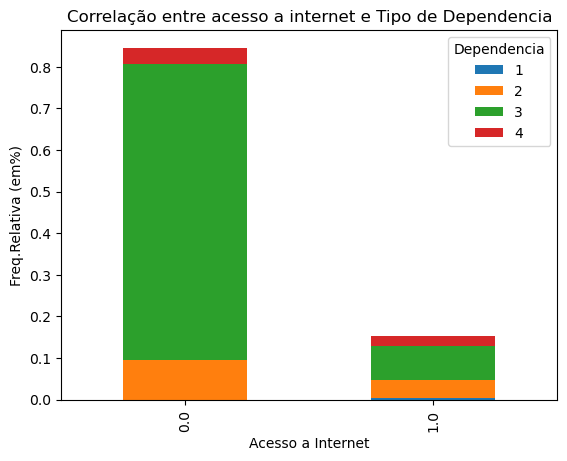

In [260]:
cross_table_Urbana_Rural = pd.crosstab(df_projeto['Alunos Internet'], df_projeto['Dependencia'], normalize=True)

print(cross_table_Urbana_Rural)

cross_table_Urbana_Rural.plot(kind='bar', stacked=True)
plt.title('Correlação entre acesso a internet e Tipo de Dependencia')
plt.xlabel('Acesso a Internet')
plt.ylabel('Freq.Relativa (em%)')
plt.show()

In [240]:
cross_table_dependencia = (pd.crosstab(df_projeto['Alunos Internet'], df_projeto['Dependencia'])/len(df_projeto))*100
cross_table_dependencia

Dependencia,1,2,3,4
Alunos Internet,,,,
0.0,0.000000,9.445360,70.803588,3.862347
1.0,0.329489,4.393191,8.090793,2.452865


### Feature: Profissionais Gerais

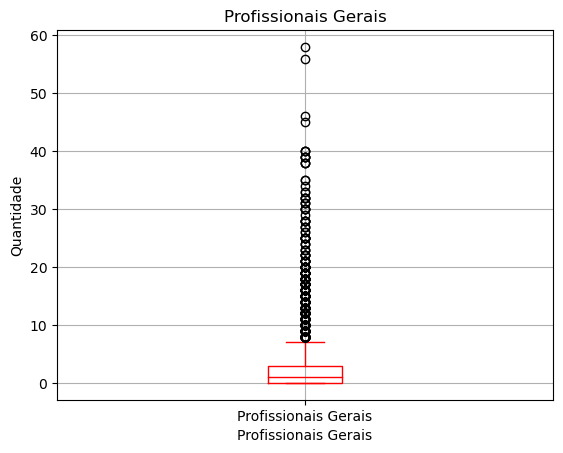

In [267]:
max_value = df_projeto["Profissionais Gerais"].max()

df_corrected = df_projeto[df_projeto["Profissionais Gerais"] != max_value]
df_corrected["Profissionais Gerais"].describe()

df_corrected["Profissionais Gerais"].plot(kind='box', color='red', grid=True)
plt.title("Profissionais Gerais")
plt.ylabel("Quantidade")
plt.xlabel("Profissionais Gerais")
plt.show()


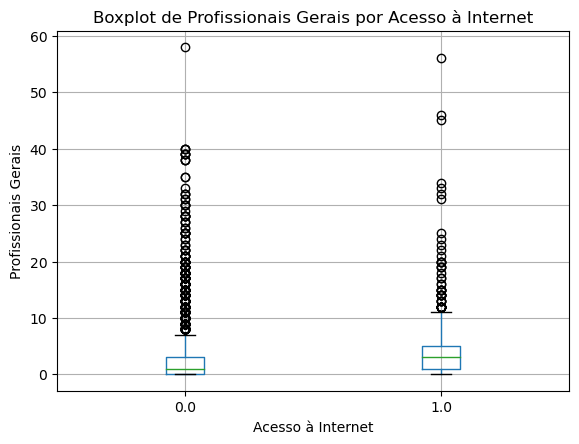

In [273]:
import matplotlib.pyplot as plt

df_corrected.boxplot(column="Profissionais Gerais", by="Alunos Internet")
plt.title('Boxplot de Profissionais Gerais por Acesso à Internet')
plt.suptitle('') # remover o título extra
plt.xlabel('Acesso à Internet')
plt.ylabel('Profissionais Gerais')
plt.show()


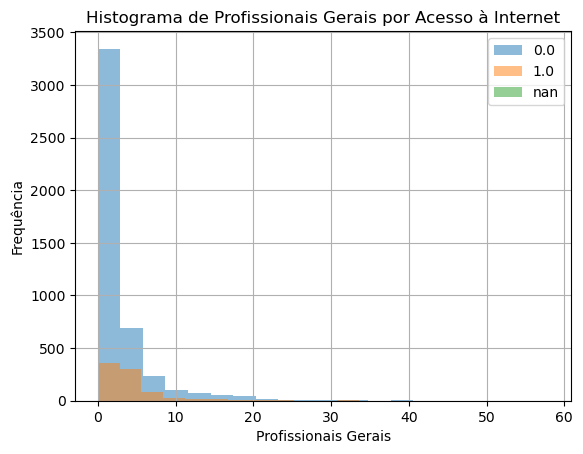

In [278]:
for category in df_corrected["Alunos Internet"].unique():
    df_corrected[df_corrected["Alunos Internet"]==category]["Profissionais Gerais"].hist(alpha=0.5, bins=20)
  
plt.title('Histograma de Profissionais Gerais por Acesso à Internet')
plt.xlabel('Profissionais Gerais')
plt.ylabel('Frequência')
plt.legend(df_corrected["Alunos Internet"].unique())
plt.show()